In [25]:
!pip install numpy

     --------------------------------------- 14.6/14.6 MB 39.9 kB/s eta 0:00:00


1. Вкладчик положил 50000 условных единиц на три разных счета в три разных банка. По первому счету выплаты составят 5% годовых, по второму – 7% годовых и по третьему 6% годовых. Известно, что через год вкладчик получил по процентам сумму в 2250 у.е. с первого и второго банка и сумму в 1400 у.е. с первого и третьего банка. Сколько условных единиц он положил на каждый счет изначально?

Розв'язок:
Нехай, x1, x2, x3 - положено грошей на 1-й, 2-й, 3-й рахунки.
Отримуємо систему рівнянь:

x1 + x2 + x3 = 50000;
0,05x1 + 0,07x2 = 2250;
0,05x1 + 0,06x3 = 1400;

In [32]:
import numpy as np
a = np.matrix("1,1,1;0.05,0.07,0;0.05,0,0.06")
b = np.matrix("50000;2250;1400")
x = np.linalg.solve(a, b).astype(int)
print(f'Положено в 1-й банк: ${int(x[0])}')
print(f'Положено в 2-й банк: ${int(x[1])}')
print(f'Положено в 3-й банк: ${int(x[2])}')

Положено в 1-й банк: $10000
Положено в 2-й банк: $25000
Положено в 3-й банк: $15000


2. На складе хранятся мобильные телефоны iPhone 6, iPhone 11, iPhone 12 моделей. Всего 1328 экземпляра. Моделей iPhone 6 на 120 меньше, чем моделей iPhone 11, и на 100 больше, чем моделей iPhone 12. Сколько моделей каждого вида на складе?

Розв'язок:
Нехай, x1, x2, x3 - кількість моделей iPhone 6, iPhone 11, iPhone 12.
Отримуємо систему рівнянь:

x1 + x2 + x3 = 1328;
-x1 + x2 = 120;
x1 - x3 = 100;

In [33]:
import numpy as np

a = np.matrix("1,1,1;-1,1,0;1,0,-1")
b = np.matrix("1328;120;100")
x = np.linalg.solve(a, b).astype(int)
print(f'Моделей iPhone 6: {int(x[0])}')
print(f'Моделей iPhone 11: {int(x[1])}')
print(f'Моделей iPhone 12: {int(x[2])}')

Моделей iPhone 6: 436
Моделей iPhone 11: 556
Моделей iPhone 12: 336


3. Составьте каноническое уравнение эллипсоида, проходящего через три точки A,B,C.

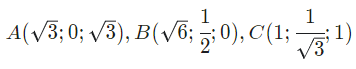

Каноническое уравнение эллипсоида в прямоугольной декартовой системе координат имеет вид:

x**2/a**2 + y**2/b**2 + x**2/c**2 = 1

Задача состоит в определении параметров a**2, b**2, c**2.

Розв'язок:
a-2 = X1
b-2 = X2
c-2 = X3
Отримуємо систему рівнянь:
3x1 + 3x3 = 1;
6x1 + 1/4x2 = 1;
x1 + 1/3x2 + x3 = 1;

In [35]:
import numpy as np

a = np.matrix([[3,0,3], [6,1/4,0], [1,1/3,1]], dtype=float)
b = np.matrix("1;1;1")
x = np.linalg.solve(a, b)
a2 = round(float(1/x[0]), 1)
b2 = round(float(1/x[1]), 1)
c2 = round(float(1/x[2]), 1)
print(f'a2={a2}, b2={b2}, c2={c2}')

a2=12.0, b2=0.5, c2=4.0


Отже, рівняння эллипсоида має вигляд:

x2/12 + 2y2 + z2/4 = 1

4. Составьте уравнение параболы проходящей через заданные три точки (1,12), (3,54), (-1,2). Необходимо найти коэффициенты уравнения a,b,ca,b,c

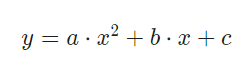
Розв'язок:
y = a · x2 + b · x + c
Підставляємо значення x, у і отримуємо систему рівнянь:

а + b + c = 12;
9a + 3b +c = 54;
a - b + c = 2;

In [36]:
import numpy as np

m1 = np.matrix("1,1,1;9,3,1;1,-1,1")
m2 = np.matrix("12;54;2")
x = np.linalg.solve(m1, m2)
a = int(x[0])
b = int(x[1])
c = int(x[2])
print(f'a={a}, b={b}, c={c}')

a=4, b=5, c=3


Отже, рівняння параболи має вигляд:
y = 4x2 + 5x + 3

5. Составьте функцию get_polynom, которая по набору точек вида (x1,y1),(x2,y2), ... (x{n+1}, y{n+1}) будет находить коэффициенты многочлена ci. Таким образом функция принимает список кортежей с координатами и возвращает набор коэффициентов c0,c1, ... ,cn.

Формула многочлена имеет вид:
c0 + c1 · x + c2 · x2 + ... + cn · xn = y

In [37]:
import numpy as np
import random

def get_polynom(coords):
    if len(coords) > 1:
        x = ''
        y = ''
        for i in range(len(coords)):
            for n in range(len(coords)):
                x += f'{coords[i][0] ** n}'
                if n == len(coords) - 1:
                    if i < len(coords) - 1:
                        x += ';'
                else:
                    x += ','
            y += f'{coords[i][1]}'
            if i < len(coords) - 1:
                y += ';'
        return np.linalg.solve(np.matrix(x), np.matrix(y))
    else:
        return 'Степень многочлена не может быть < 1.'

n = 2 # Степень многочлена
coords = []
for i in range(n + 1):
    coords.append((random.randint(0, 10), random.randint(0, 10)))
print(f'Список координат: {coords}')
try:
    print('Коэффициенты многочлена:')
    c = get_polynom(coords).flatten()
    for i in range(n + 1):
        print(f'c{i} = {round(c[0, i], 3)}')
except:
    print('Для заданного списка координат не существует решения.')

Список координат: [(9, 10), (1, 10), (2, 0)]
Коэффициенты многочлена:
c0 = 22.857
c1 = -14.286
c2 = 1.429
